In [2]:
%pip install seaborn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached matplotlib-3.10.8-cp314-cp314-win_amd64.whl.metadata (52 kB)
  Using cached contourpy-1.3.3-cp314-cp314-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.61.1-cp314-cp314-win_amd64.whl.metadata (116 kB)
  Using cached kiwisolver-1.4.9-cp314-cp314-win_amd64.whl.metadata (6.4 kB)
  Using cached pyparsing-3.3.2-py3-none-any.whl.metadata (5.8 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached matplotlib-3.10.8-cp314-cp314-win_amd64.whl (8.3 MB)
Using cached contourpy-1.3.3-cp314-cp314-win_amd64.whl (232 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.61.1-cp314-cp314-win_amd64.whl (2.3 MB)
   ---------------------------------------- 0.0/7.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.2 MB ? eta -:--:--
   - -------------------------------------- 0.3/7.2 MB ? eta -


[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
sns.set_theme(style="whitegrid", palette="Set2")

if not os.path.exists("visualizations"):
    os.makedirs("visualizations")

In [4]:
df = pd.read_csv("sales_data.csv")
df.columns = df.columns.str.strip()

# Auto-detect important columns
sales_col = next((c for c in df.columns if "sale" in c.lower() or "revenue" in c.lower()), None)
category_col = next((c for c in df.columns if "category" in c.lower()), None)
region_col = next((c for c in df.columns if "region" in c.lower()), None)
date_col = next((c for c in df.columns if "date" in c.lower()), None)

# Fallback to Product if Category missing
if not category_col:
    category_col = next((c for c in df.columns if "product" in c.lower()), None)

# Date processing
if date_col:
    df[date_col] = pd.to_datetime(df[date_col], errors="coerce")
    df["Month"] = df[date_col].dt.month
    df["Year"] = df[date_col].dt.year

df = df.dropna()

In [5]:
monthly_sales = df.groupby("Month")[sales_col].sum().reset_index()
category_sales = df.groupby(category_col)[sales_col].sum().reset_index()
region_sales = df.groupby(region_col)[sales_col].sum().reset_index()

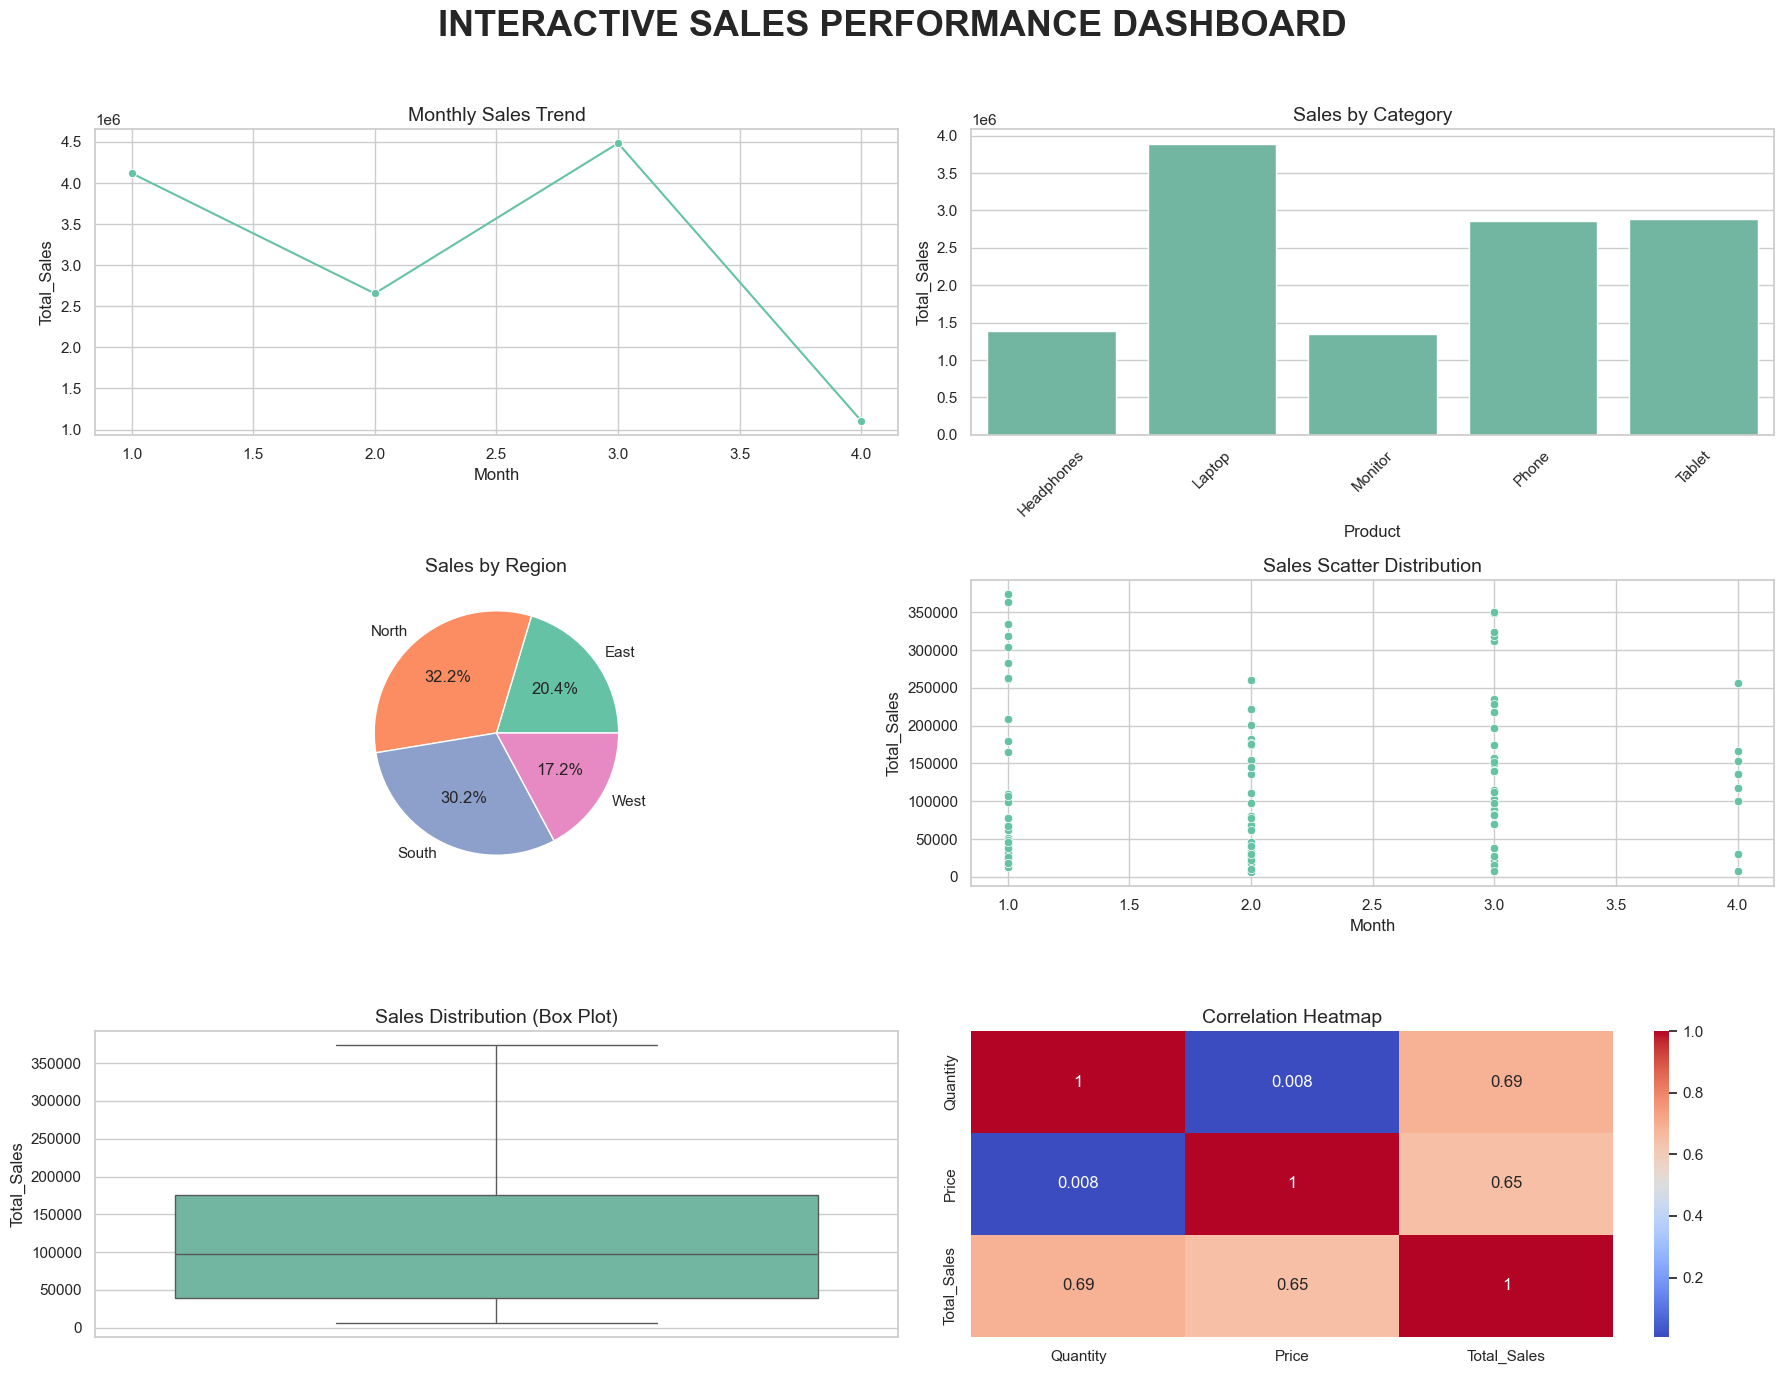

✅ 6-Chart Seaborn Dashboard Created Successfully!


In [6]:
fig, axes = plt.subplots(3, 2, figsize=(18, 14))
fig.suptitle("INTERACTIVE SALES PERFORMANCE DASHBOARD",
             fontsize=26, fontweight="bold", y=0.98)

# 1️⃣ Line Plot
sns.lineplot(data=monthly_sales,
             x="Month",
             y=sales_col,
             marker="o",
             ax=axes[0,0])
axes[0,0].set_title("Monthly Sales Trend", fontsize=14)

# 2️⃣ Bar Plot
sns.barplot(data=category_sales,
            x=category_col,
            y=sales_col,
            ax=axes[0,1])
axes[0,1].set_title("Sales by Category", fontsize=14)
axes[0,1].tick_params(axis='x', rotation=45)

# 3️⃣ Pie Chart (matplotlib)
axes[1,0].pie(region_sales[sales_col],
              labels=region_sales[region_col],
              autopct='%1.1f%%')
axes[1,0].set_title("Sales by Region", fontsize=14)

# 4️⃣ Scatter Plot
sns.scatterplot(data=df,
                x="Month",
                y=sales_col,
                ax=axes[1,1])
axes[1,1].set_title("Sales Scatter Distribution", fontsize=14)

# 5️⃣ Box Plot
sns.boxplot(data=df,
            y=sales_col,
            ax=axes[2,0])
axes[2,0].set_title("Sales Distribution (Box Plot)", fontsize=14)

# 6️⃣ Heatmap
corr = df.select_dtypes(include=["int64","float64"]).corr()
sns.heatmap(corr,
            annot=True,
            cmap="coolwarm",
            ax=axes[2,1])
axes[2,1].set_title("Correlation Heatmap", fontsize=14)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Save dashboard
plt.savefig("visualizations/seaborn_sales_dashboard.png", dpi=300)
plt.show()

print("✅ 6-Chart Seaborn Dashboard Created Successfully!")